<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/master/C3/W4/ungraded_labs/C3_W4_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ungraded Lab: Generating Text with Neural Networks

For this week, you will look at techniques to prepare data and build models for text generation. You will train a neural network with lyrics from an Irish song then let it make a new song for you. Though this might sound like a more complex application, you'll soon see that the process is very similar to the ones you've been using in the previous weeks. Only minor modifications are needed. Let's see what these are in the next sections.

## Imports

First, you will import the required libraries. You've used all of these already in the previous labs.

In [ ]:
import tensorflow as tf
import numpy as np 
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## Building the Word Vocabulary

The dataset is the lyrics of [*Lanigan's Ball*](https://en.wikipedia.org/wiki/Lanigan%27s_Ball), a traditional Irish song. You will split it per line then use the `Tokenizer` class to build the word index dictionary.

In [1]:
data = "In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."
data

'In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Ne

In [7]:
print(data)
corpus = data.lower().split("\n")
#corpus = data.split("\n") , same effect with or without lower

In the town of Athy one Jeremy Lanigan 
 Battered away til he hadnt a pound. 
His father died and made him a man again 
 Left him a farm and ten acres of ground. 
He gave a grand party for friends and relations 
Who didnt forget him when come to the wall, 
And if youll but listen Ill make your eyes glisten 
Of the rows and the ructions of Lanigans Ball. 
Myself to be sure got free invitation, 
For all the nice girls and boys I might ask, 
And just in a minute both friends and relations 
Were dancing round merry as bees round a cask. 
Judy ODaly, that nice little milliner, 
She tipped me a wink for to give her a call, 
And I soon arrived with Peggy McGilligan 
Just in time for Lanigans Ball. 
There were lashings of punch and wine for the ladies, 
Potatoes and cakes; there was bacon and tea, 
There were the Nolans, Dolans, OGradys 
Courting the girls and dancing away. 
Songs they went round as plenty as water, 
The harp that once sounded in Taras old hall,
Sweet Nelly Gray and The Rat Ca

In [3]:
print(corpus)

['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ', ' left him a farm and ten acres of ground. ', 'he gave a grand party for friends and relations ', 'who didnt forget him when come to the wall, ', 'and if youll but listen ill make your eyes glisten ', 'of the rows and the ructions of lanigans ball. ', 'myself to be sure got free invitation, ', 'for all the nice girls and boys i might ask, ', 'and just in a minute both friends and relations ', 'were dancing round merry as bees round a cask. ', 'judy odaly, that nice little milliner, ', 'she tipped me a wink for to give her a call, ', 'and i soon arrived with peggy mcgilligan ', 'just in time for lanigans ball. ', 'there were lashings of punch and wine for the ladies, ', 'potatoes and cakes; there was bacon and tea, ', 'there were the nolans, dolans, ogradys ', 'courting the girls and dancing away. ', 'songs they went round as plenty as water, ', 'the harp tha

In [30]:
import tensorflow as tf
import numpy as np 
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [4]:
# Define the lyrics of the song
data="In the town of Athy one Jeremy Lanigan \n Battered away til he hadnt a pound. \nHis father died and made him a man again \n Left him a farm and ten acres of ground. \nHe gave a grand party for friends and relations \nWho didnt forget him when come to the wall, \nAnd if youll but listen Ill make your eyes glisten \nOf the rows and the ructions of Lanigans Ball. \nMyself to be sure got free invitation, \nFor all the nice girls and boys I might ask, \nAnd just in a minute both friends and relations \nWere dancing round merry as bees round a cask. \nJudy ODaly, that nice little milliner, \nShe tipped me a wink for to give her a call, \nAnd I soon arrived with Peggy McGilligan \nJust in time for Lanigans Ball. \nThere were lashings of punch and wine for the ladies, \nPotatoes and cakes; there was bacon and tea, \nThere were the Nolans, Dolans, OGradys \nCourting the girls and dancing away. \nSongs they went round as plenty as water, \nThe harp that once sounded in Taras old hall,\nSweet Nelly Gray and The Rat Catchers Daughter,\nAll singing together at Lanigans Ball. \nThey were doing all kinds of nonsensical polkas \nAll round the room in a whirligig. \nJulia and I, we banished their nonsense \nAnd tipped them the twist of a reel and a jig. \nAch mavrone, how the girls got all mad at me \nDanced til youd think the ceiling would fall. \nFor I spent three weeks at Brooks Academy \nLearning new steps for Lanigans Ball. \nThree long weeks I spent up in Dublin, \nThree long weeks to learn nothing at all,\n Three long weeks I spent up in Dublin, \nLearning new steps for Lanigans Ball. \nShe stepped out and I stepped in again, \nI stepped out and she stepped in again, \nShe stepped out and I stepped in again, \nLearning new steps for Lanigans Ball. \nBoys were all merry and the girls they were hearty \nAnd danced all around in couples and groups, \nTil an accident happened, young Terrance McCarthy \nPut his right leg through miss Finnertys hoops. \nPoor creature fainted and cried Meelia murther, \nCalled for her brothers and gathered them all. \nCarmody swore that hed go no further \nTil he had satisfaction at Lanigans Ball. \nIn the midst of the row miss Kerrigan fainted, \nHer cheeks at the same time as red as a rose. \nSome of the lads declared she was painted, \nShe took a small drop too much, I suppose. \nHer sweetheart, Ned Morgan, so powerful and able, \nWhen he saw his fair colleen stretched out by the wall, \nTore the left leg from under the table \nAnd smashed all the Chaneys at Lanigans Ball. \nBoys, oh boys, twas then there were runctions. \nMyself got a lick from big Phelim McHugh. \nI soon replied to his introduction \nAnd kicked up a terrible hullabaloo. \nOld Casey, the piper, was near being strangled. \nThey squeezed up his pipes, bellows, chanters and all. \nThe girls, in their ribbons, they got all entangled \nAnd that put an end to Lanigans Ball."

# Split the long string per line and put in a list
corpus = data.lower().split("\n")

# Preview the result
print(corpus)

['in the town of athy one jeremy lanigan ', ' battered away til he hadnt a pound. ', 'his father died and made him a man again ', ' left him a farm and ten acres of ground. ', 'he gave a grand party for friends and relations ', 'who didnt forget him when come to the wall, ', 'and if youll but listen ill make your eyes glisten ', 'of the rows and the ructions of lanigans ball. ', 'myself to be sure got free invitation, ', 'for all the nice girls and boys i might ask, ', 'and just in a minute both friends and relations ', 'were dancing round merry as bees round a cask. ', 'judy odaly, that nice little milliner, ', 'she tipped me a wink for to give her a call, ', 'and i soon arrived with peggy mcgilligan ', 'just in time for lanigans ball. ', 'there were lashings of punch and wine for the ladies, ', 'potatoes and cakes; there was bacon and tea, ', 'there were the nolans, dolans, ogradys ', 'courting the girls and dancing away. ', 'songs they went round as plenty as water, ', 'the harp tha

In [21]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus)
tokenizer.index_word
total_words = len(tokenizer.index_word)+1

In [16]:
print(f'word index dictionary:{tokenizer.word_index}')
print(f'total words: {total_words}')

word index dictionary:{'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 81

NameError: name 'total_words' is not defined

In [13]:
# Initialize the Tokenizer class
tokenizer = Tokenizer()

# Generate the word index dictionary
tokenizer.fit_on_texts(corpus)

# Define the total words. You add 1 for the index `0` which is just the padding token.
total_words = len(tokenizer.word_index) + 1

print(f'word index dictionary: {tokenizer.word_index}')
print(f'total words: {total_words}')

word index dictionary: {'and': 1, 'the': 2, 'a': 3, 'in': 4, 'all': 5, 'i': 6, 'for': 7, 'of': 8, 'lanigans': 9, 'ball': 10, 'were': 11, 'at': 12, 'to': 13, 'she': 14, 'stepped': 15, 'his': 16, 'girls': 17, 'as': 18, 'they': 19, 'til': 20, 'he': 21, 'again': 22, 'got': 23, 'boys': 24, 'round': 25, 'that': 26, 'her': 27, 'there': 28, 'three': 29, 'weeks': 30, 'up': 31, 'out': 32, 'him': 33, 'was': 34, 'spent': 35, 'learning': 36, 'new': 37, 'steps': 38, 'long': 39, 'away': 40, 'left': 41, 'friends': 42, 'relations': 43, 'when': 44, 'wall': 45, 'myself': 46, 'nice': 47, 'just': 48, 'dancing': 49, 'merry': 50, 'tipped': 51, 'me': 52, 'soon': 53, 'time': 54, 'old': 55, 'their': 56, 'them': 57, 'danced': 58, 'dublin': 59, 'an': 60, 'put': 61, 'leg': 62, 'miss': 63, 'fainted': 64, 'from': 65, 'town': 66, 'athy': 67, 'one': 68, 'jeremy': 69, 'lanigan': 70, 'battered': 71, 'hadnt': 72, 'pound': 73, 'father': 74, 'died': 75, 'made': 76, 'man': 77, 'farm': 78, 'ten': 79, 'acres': 80, 'ground': 8

## Preprocessing the Dataset

Next, you will be generating the training sequences and their labels. As discussed in the lectures, you will take each line of the song and generate inputs and labels from it. For example, if you only have one sentence: "I am using Tensorflow", you want the model to learn the next word given any subphrase of this sentence:

```
INPUT              LABEL
-----------------------------
I             ---> am
I am          ---> using
I am using    ---> Tensorflow
```

The next cell shows how to implement this concept in code. The result would be inputs as padded sequences, and labels as one-hot encoded arrays.

In [9]:
import numpy as np

In [10]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
[len(x) for x in input_sequences]

[]

In [14]:
token_list

[]

In [17]:
input_sequences = []
for line in corpus:
    token_list = tokenizer.texts_to_sequences([line])[0]
    
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)
        
max_sequence_len = max([len(x) for x in input_sequences])
    
input_sequences = np.array(pad_sequences(input_sequences, maxlen = max_sequence_len,padding = "pre"))

In [18]:
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]


In [19]:
len(set(labels))

246

In [22]:
ys = tf.keras.utils.to_categorical(labels, num_classes = total_words)

In [76]:
# Initialize the sequences list
input_sequences = []

# Loop over every line
for line in corpus:

	# Tokenize the current line
	token_list = tokenizer.texts_to_sequences([line])[0]

	# Loop over the line several times to generate the subphrases
	for i in range(1, len(token_list)):
		
		# Generate the subphrase
		n_gram_sequence = token_list[:i+1]

		# Append the subphrase to the sequences list
		input_sequences.append(n_gram_sequence)

# Get the length of the longest line
max_sequence_len = max([len(x) for x in input_sequences])

# Pad all sequences
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

# Create inputs and label by splitting the last token in the subphrases
xs, labels = input_sequences[:,:-1],input_sequences[:,-1]

# Convert the label into one-hot arrays
ys = tf.keras.utils.to_categorical(labels, num_classes=total_words)

In [42]:
len(xs)

453

In [39]:
labels[1]

0

In [23]:
[tokenizer.index_word[i] for i in labels if i != 0 ]

['the',
 'town',
 'of',
 'athy',
 'one',
 'jeremy',
 'lanigan',
 'away',
 'til',
 'he',
 'hadnt',
 'a',
 'pound',
 'father',
 'died',
 'and',
 'made',
 'him',
 'a',
 'man',
 'again',
 'him',
 'a',
 'farm',
 'and',
 'ten',
 'acres',
 'of',
 'ground',
 'gave',
 'a',
 'grand',
 'party',
 'for',
 'friends',
 'and',
 'relations',
 'didnt',
 'forget',
 'him',
 'when',
 'come',
 'to',
 'the',
 'wall',
 'if',
 'youll',
 'but',
 'listen',
 'ill',
 'make',
 'your',
 'eyes',
 'glisten',
 'the',
 'rows',
 'and',
 'the',
 'ructions',
 'of',
 'lanigans',
 'ball',
 'to',
 'be',
 'sure',
 'got',
 'free',
 'invitation',
 'all',
 'the',
 'nice',
 'girls',
 'and',
 'boys',
 'i',
 'might',
 'ask',
 'just',
 'in',
 'a',
 'minute',
 'both',
 'friends',
 'and',
 'relations',
 'dancing',
 'round',
 'merry',
 'as',
 'bees',
 'round',
 'a',
 'cask',
 'odaly',
 'that',
 'nice',
 'little',
 'milliner',
 'tipped',
 'me',
 'a',
 'wink',
 'for',
 'to',
 'give',
 'her',
 'a',
 'call',
 'i',
 'soon',
 'arrived',
 'wit

Let's see the result for the first line of the song. The particular line and the expected token sequence is shown in the cell below:

In [24]:
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

token_list = []
for word in sentence:
    token_list.append(tokenizer.word_index[word])
    
print(token_list)

sample sentence: ['in', 'the', 'town', 'of', 'athy', 'one', 'jeremy', 'lanigan']
[4, 2, 66, 8, 67, 68, 69, 70]


In [49]:
# Get sample sentence
sentence = corpus[0].split()
print(f'sample sentence: {sentence}')

# Initialize token list
token_list = []

# Look up the indices of each word and append to the list
for word in sentence: 
    token_list.append(tokenizer.word_index[word])

# Print the token list
print(token_list)

sample sentence: ['in', 'the', 'town', 'of', 'athy', 'one', 'jeremy', 'lanigan']
[4, 2, 66, 8, 67, 68, 69, 70]


Since there are 8 tokens here, you can expect to find this particular line in the first 7 elements of the `xs` that you generated earlier. If we get the longest subphrase generated, that should be found in `xs[6]`. See the padded token sequence below:

In [77]:
len(set(labels))

246

In [68]:
#words that are not in the label (felix)
for i in range(263):
    if i not in set(labels) and i !=0:
        print (i,':\t', tokenizer.index_word[i])

36 :	 learning
46 :	 myself
71 :	 battered
85 :	 who
110 :	 judy
125 :	 potatoes
132 :	 courting
133 :	 songs
142 :	 sweet
156 :	 julia
163 :	 ach
189 :	 poor
194 :	 called
197 :	 carmody
212 :	 some
233 :	 tore


In [ ]:
14, 1, 27,44

In [25]:
elem_num =6
print(xs[6])

[ 0  0  0  4  2 66  8 67 68 69]


In [26]:
print(tokenizer.sequences_to_texts([xs[6]]))

['in the town of athy one jeremy']


In [24]:
# Pick element
elem_number = 6

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')


token list: [ 0  0  0  4  2 66  8 67 68 69]
decoded to text: ['in the town of athy one jeremy']


If you print out the label, it should show `70` because that is the next word in the phrase (i.e. `lanigan`). See the one-hot encoded form below. You can use the [`np.argmax()`](https://numpy.org/doc/stable/reference/generated/numpy.argmax.html) method to get the index of the 'hot' label.

In [27]:
ys[6]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
np.argmax(ys[6])

70

In [ ]:
# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

If you pick the element before that, you will see the same subphrase as above minus one word:

In [ ]:
# Pick element
elem_number = 5

# Print token list and phrase
print(f'token list: {xs[elem_number]}')
print(f'decoded to text: {tokenizer.sequences_to_texts([xs[elem_number]])}')

# Print label
print(f'one-hot label: {ys[elem_number]}')
print(f'index of label: {np.argmax(ys[elem_number])}')

## Build the Model

Next, you will build the model with basically the same layers as before. The main difference is you will remove the sigmoid output and use a softmax activated `Dense` layer instead. This output layer will have one neuron for each word in the vocabulary. So given an input token list, the output array of the final layer will have the probabilities for each word.

In [32]:
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.models import Sequential

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional

In [78]:
# Build the model
model = Sequential([
          Embedding(total_words, 64, input_length=max_sequence_len-1),
          Bidirectional(LSTM(20)),
          Dense(total_words, activation='softmax')
])

# Use categorical crossentropy because this is a multi-class problem
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_45 (Embedding)    (None, 10, 64)            16832     
                                                                 
 bidirectional_9 (Bidirectio  (None, 40)               13600     
 nal)                                                            
                                                                 
 dense_43 (Dense)            (None, 263)               10783     
                                                                 
Total params: 41,215
Trainable params: 41,215
Non-trainable params: 0
_________________________________________________________________


## Train the model

You can now train the model. We have a relatively small vocabulary so it will only take a couple of minutes to complete 500 epochs.

In [79]:
history = model.fit(xs,ys,epochs =500)

Epoch 1/500
15/15 [==============================] - 3s 5ms/step - loss: 5.5683 - accuracy: 0.0221
Epoch 2/500
15/15 [==============================] - 0s 5ms/step - loss: 5.5415 - accuracy: 0.0508
Epoch 3/500
15/15 [==============================] - 0s 5ms/step - loss: 5.4715 - accuracy: 0.0508
Epoch 4/500
15/15 [==============================] - 0s 5ms/step - loss: 5.2755 - accuracy: 0.0508
Epoch 5/500
15/15 [==============================] - 0s 5ms/step - loss: 5.1123 - accuracy: 0.0508
Epoch 6/500
15/15 [==============================] - 0s 5ms/step - loss: 5.0553 - accuracy: 0.0574
Epoch 7/500
15/15 [==============================] - 0s 5ms/step - loss: 5.0160 - accuracy: 0.0596
Epoch 8/500
15/15 [==============================] - 0s 5ms/step - loss: 4.9855 - accuracy: 0.0508
Epoch 9/500
15/15 [==============================] - 0s 5ms/step - loss: 4.9486 - accuracy: 0.0530
Epoch 10/500
15/15 [==============================] - 0s 5ms/step - loss: 4.9122 - accuracy: 0.0618
Epoch 11/

15/15 [==============================] - 0s 5ms/step - loss: 2.3075 - accuracy: 0.5960
Epoch 84/500
15/15 [==============================] - 0s 5ms/step - loss: 2.3003 - accuracy: 0.5828
Epoch 85/500
15/15 [==============================] - 0s 5ms/step - loss: 2.2741 - accuracy: 0.6004
Epoch 86/500
15/15 [==============================] - 0s 4ms/step - loss: 2.2498 - accuracy: 0.6115
Epoch 87/500
15/15 [==============================] - 0s 4ms/step - loss: 2.2263 - accuracy: 0.6159
Epoch 88/500
15/15 [==============================] - 0s 5ms/step - loss: 2.1930 - accuracy: 0.6115
Epoch 89/500
15/15 [==============================] - 0s 5ms/step - loss: 2.1709 - accuracy: 0.6313
Epoch 90/500
15/15 [==============================] - 0s 5ms/step - loss: 2.1411 - accuracy: 0.6424
Epoch 91/500
15/15 [==============================] - 0s 5ms/step - loss: 2.1124 - accuracy: 0.6600
Epoch 92/500
15/15 [==============================] - 0s 5ms/step - loss: 2.0905 - accuracy: 0.6623
Epoch 93/500


15/15 [==============================] - 0s 5ms/step - loss: 0.9653 - accuracy: 0.8786
Epoch 165/500
15/15 [==============================] - 0s 5ms/step - loss: 0.9546 - accuracy: 0.8808
Epoch 166/500
15/15 [==============================] - 0s 5ms/step - loss: 0.9449 - accuracy: 0.8786
Epoch 167/500
15/15 [==============================] - 0s 5ms/step - loss: 0.9429 - accuracy: 0.8830
Epoch 168/500
15/15 [==============================] - 0s 5ms/step - loss: 0.9302 - accuracy: 0.8874
Epoch 169/500
15/15 [==============================] - 0s 5ms/step - loss: 0.9264 - accuracy: 0.8852
Epoch 170/500
15/15 [==============================] - 0s 5ms/step - loss: 0.9324 - accuracy: 0.8852
Epoch 171/500
15/15 [==============================] - 0s 5ms/step - loss: 0.9204 - accuracy: 0.8896
Epoch 172/500
15/15 [==============================] - 0s 5ms/step - loss: 0.9281 - accuracy: 0.8830
Epoch 173/500
15/15 [==============================] - 0s 5ms/step - loss: 0.9206 - accuracy: 0.8720
Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.5601 - accuracy: 0.9183
Epoch 246/500
15/15 [==============================] - 0s 5ms/step - loss: 0.5370 - accuracy: 0.9205
Epoch 247/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4999 - accuracy: 0.9249
Epoch 248/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4939 - accuracy: 0.9338
Epoch 249/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4759 - accuracy: 0.9316
Epoch 250/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4525 - accuracy: 0.9404
Epoch 251/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4481 - accuracy: 0.9404
Epoch 252/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4374 - accuracy: 0.9426
Epoch 253/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4280 - accuracy: 0.9404
Epoch 254/500
15/15 [==============================] - 0s 5ms/step - loss: 0.4162 - accuracy: 0.9426
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 0.2526 - accuracy: 0.9470
Epoch 327/500
15/15 [==============================] - 0s 6ms/step - loss: 0.2502 - accuracy: 0.9492
Epoch 328/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2499 - accuracy: 0.9448
Epoch 329/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2487 - accuracy: 0.9448
Epoch 330/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2461 - accuracy: 0.9492
Epoch 331/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2453 - accuracy: 0.9514
Epoch 332/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2425 - accuracy: 0.9514
Epoch 333/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2420 - accuracy: 0.9470
Epoch 334/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2418 - accuracy: 0.9470
Epoch 335/500
15/15 [==============================] - 0s 5ms/step - loss: 0.2411 - accuracy: 0.9448
Epoc

15/15 [==============================] - 0s 5ms/step - loss: 0.1828 - accuracy: 0.9470
Epoch 408/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1771 - accuracy: 0.9514
Epoch 409/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1741 - accuracy: 0.9514
Epoch 410/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1758 - accuracy: 0.9492
Epoch 411/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1729 - accuracy: 0.9536
Epoch 412/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1730 - accuracy: 0.9426
Epoch 413/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1714 - accuracy: 0.9492
Epoch 414/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1710 - accuracy: 0.9448
Epoch 415/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1685 - accuracy: 0.9514
Epoch 416/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1665 - accuracy: 0.9514
Epoc

15/15 [==============================] - 0s 6ms/step - loss: 0.1333 - accuracy: 0.9470
Epoch 489/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1357 - accuracy: 0.9492
Epoch 490/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1428 - accuracy: 0.9470
Epoch 491/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1452 - accuracy: 0.9448
Epoch 492/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1413 - accuracy: 0.9514
Epoch 493/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1376 - accuracy: 0.9448
Epoch 494/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1333 - accuracy: 0.9470
Epoch 495/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1322 - accuracy: 0.9426
Epoch 496/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1311 - accuracy: 0.9514
Epoch 497/500
15/15 [==============================] - 0s 5ms/step - loss: 0.1301 - accuracy: 0.9448
Epoc

In [ ]:
# Train the model
history = model.fit(xs, ys, epochs=500)

You can visualize the results with the utility below. With the default settings, you should see around 95% accuracy after 500 epochs.

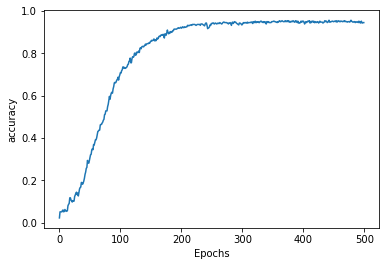

In [80]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.show()
    
plot_graphs(history, 'accuracy')

In [ ]:
import matplotlib.pyplot as plt

# Plot utility
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

# Visualize the accuracy
plot_graphs(history, 'accuracy')

## Generating Text

With the model trained, you can now use it to make its own song! The process would look like:

1. Feed a seed text to initiate the process.
2. Model predicts the index of the most probable next word.
3. Look up the index in the reverse word index dictionary
4. Append the next word to the seed text.
5. Feed the result to the model again.

Steps 2 to 5 will repeat until the desired length of the song is reached. See how it is implemented in the code below:

In [87]:
np.argmax(probabilities, axis=-1)[1]

IndexError: index 1 is out of bounds for axis 0 with size 1

In [91]:
np.argmax(probabilities, axis=-1)[1]

array([54], dtype=int64)

In [105]:
seed_text = "Laurence went to Dublin"
next_words = 100

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen = max_sequence_len-1, padding = "pre")
    print(token_list)
    probabilities = model.predict(token_list)
    #print(probabilities)
    predicted = np.argmax(probabilities, axis=-1)[0]
    if predicted!=0:
        output_word = tokenizer.index_word[predicted]
        seed_text += " "+ output_word
        
        
    print(seed_text)

[[  0   0   0   0   0   0   0 134  13  59]]
Laurence went to Dublin time
[[  0   0   0   0   0   0 134  13  59  54]]
Laurence went to Dublin time lanigans
[[  0   0   0   0   0 134  13  59  54   9]]
Laurence went to Dublin time lanigans ball
[[  0   0   0   0 134  13  59  54   9  10]]
Laurence went to Dublin time lanigans ball ball
[[  0   0   0 134  13  59  54   9  10  10]]
Laurence went to Dublin time lanigans ball ball as
[[  0   0 134  13  59  54   9  10  10  18]]
Laurence went to Dublin time lanigans ball ball as ask
[[  0 134  13  59  54   9  10  10  18 105]]
Laurence went to Dublin time lanigans ball ball as ask water
[[134  13  59  54   9  10  10  18 105 136]]
Laurence went to Dublin time lanigans ball ball as ask water lanigan
[[ 13  59  54   9  10  10  18 105 136  70]]
Laurence went to Dublin time lanigans ball ball as ask water lanigan ructions
[[ 59  54   9  10  10  18 105 136  70  99]]
Laurence went to Dublin time lanigans ball ball as ask water lanigan ructions a
[[ 54   

Laurence went to Dublin time lanigans ball ball as ask water lanigan ructions a rose lanigan water pound pound lanigan table ground table didnt so wall entangled entangled entangled entangled entangled entangled entangled entangled entangled didnt listen your eyes glisten arrived fall glisten glisten glisten rat strangled strangled
[[ 96  97 117 171  97  97  97 145 255 255]]
Laurence went to Dublin time lanigans ball ball as ask water lanigan ructions a rose lanigan water pound pound lanigan table ground table didnt so wall entangled entangled entangled entangled entangled entangled entangled entangled entangled didnt listen your eyes glisten arrived fall glisten glisten glisten rat strangled strangled strangled
[[ 97 117 171  97  97  97 145 255 255 255]]
Laurence went to Dublin time lanigans ball ball as ask water lanigan ructions a rose lanigan water pound pound lanigan table ground table didnt so wall entangled entangled entangled entangled entangled entangled entangled entangled en

Laurence went to Dublin time lanigans ball ball as ask water lanigan ructions a rose lanigan water pound pound lanigan table ground table didnt so wall entangled entangled entangled entangled entangled entangled entangled entangled entangled didnt listen your eyes glisten arrived fall glisten glisten glisten rat strangled strangled strangled strangled strangled ask twas polkas strangled hall rose father rose rose pound pound pipes academy academy hoops being strangled
[[211 211  73  73 257 173 173 188 254 255]]
Laurence went to Dublin time lanigans ball ball as ask water lanigan ructions a rose lanigan water pound pound lanigan table ground table didnt so wall entangled entangled entangled entangled entangled entangled entangled entangled entangled didnt listen your eyes glisten arrived fall glisten glisten glisten rat strangled strangled strangled strangled strangled ask twas polkas strangled hall rose father rose rose pound pound pipes academy academy hoops being strangled pipes
[[21

Laurence went to Dublin time lanigans ball ball as ask water lanigan ructions a rose lanigan water pound pound lanigan table ground table didnt so wall entangled entangled entangled entangled entangled entangled entangled entangled entangled didnt listen your eyes glisten arrived fall glisten glisten glisten rat strangled strangled strangled strangled strangled ask twas polkas strangled hall rose father rose rose pound pound pipes academy academy hoops being strangled pipes strangled nonsense strangled strangled nonsense nonsense replied twist twist away a pound lanigan nolans
[[159 159 246 160 160  40   3  73  70 129]]
Laurence went to Dublin time lanigans ball ball as ask water lanigan ructions a rose lanigan water pound pound lanigan table ground table didnt so wall entangled entangled entangled entangled entangled entangled entangled entangled entangled didnt listen your eyes glisten arrived fall glisten glisten glisten rat strangled strangled strangled strangled strangled ask twas

Laurence went to Dublin time lanigans ball ball as ask water lanigan ructions a rose lanigan water pound pound lanigan table ground table didnt so wall entangled entangled entangled entangled entangled entangled entangled entangled entangled didnt listen your eyes glisten arrived fall glisten glisten glisten rat strangled strangled strangled strangled strangled ask twas polkas strangled hall rose father rose rose pound pound pipes academy academy hoops being strangled pipes strangled nonsense strangled strangled nonsense nonsense replied twist twist away a pound lanigan nolans nonsense nonsense nonsense pipes your eyes strangled arrived hall glisten strangled strangled strangled
[[257  95  96 255 117 141  97 255 255 255]]
Laurence went to Dublin time lanigans ball ball as ask water lanigan ructions a rose lanigan water pound pound lanigan table ground table didnt so wall entangled entangled entangled entangled entangled entangled entangled entangled entangled didnt listen your eyes gli

In [101]:
# Define seed text
seed_text = "Laurence went to Dublin"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

    # Convert the seed text to a token sequence
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    # Pad the sequence
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    print(token_list)

    # Feed to the model and get the probabilities for each index
    probabilities = model.predict(token_list)

    # Get the index with the highest probability
    predicted = np.argmax(probabilities, axis=-1)[0]

    # Ignore if index is 0 because that is just the padding.
    if predicted != 0:
        
        # Look up the word associated with the index. 
        output_word = tokenizer.index_word[predicted]

        # Combine with the seed text
        seed_text += " " + output_word

# Print the result	
print(seed_text)

[[  0   0   0   0   0   0   0 134  13  59]]
[[  0   0   0   0   0   0 134  13  59  54]]
[[  0   0   0   0   0 134  13  59  54   9]]
[[  0   0   0   0 134  13  59  54   9  10]]
[[  0   0   0 134  13  59  54   9  10  10]]
[[  0   0 134  13  59  54   9  10  10  18]]
[[  0 134  13  59  54   9  10  10  18 105]]
[[134  13  59  54   9  10  10  18 105 136]]
[[ 13  59  54   9  10  10  18 105 136  70]]
[[ 59  54   9  10  10  18 105 136  70  99]]
[[ 54   9  10  10  18 105 136  70  99   3]]
[[  9  10  10  18 105 136  70  99   3 211]]
[[ 10  10  18 105 136  70  99   3 211  70]]
[[ 10  18 105 136  70  99   3 211  70 136]]
[[ 18 105 136  70  99   3 211  70 136  73]]
[[105 136  70  99   3 211  70 136  73  73]]
[[136  70  99   3 211  70 136  73  73  70]]
[[ 70  99   3 211  70 136  73  73  70 235]]
[[ 99   3 211  70 136  73  73  70 235  81]]
[[  3 211  70 136  73  73  70 235  81 235]]
[[211  70 136  73  73  70 235  81 235  86]]
[[ 70 136  73  73  70 235  81 235  86 225]]
[[136  73  73  70 235  81 235  8

In the output above, you might notice frequent repetition of words the longer the sentence gets. There are ways to get around it and the next cell shows one. Basically, instead of getting the index with max probability, you will get the top three indices and choose one at random. See if the output text makes more sense with this approach. This is not the most time efficient solution because it is always sorting the entire array even if you only need the top three. Feel free to improve it and of course, you can also develop your own method of picking the next word.

In [111]:
choice = np.random.choice([1,2,3])

In [ ]:
probabilities

In [116]:
np.argsort(probabilities)[0]

array([[ 13, 112,  23,  26,  17,   1,  27,  19, 214, 111, 115,  16,  37,
         14,  30, 101, 165, 251, 100,   7,   8,  67, 252, 260,   2, 232,
        246, 118,  38, 137,  42,  45,  32, 144,  65, 164, 220,  81, 215,
         15, 206, 146, 122,  44,  35, 253,  51, 205, 213,  66,  99,  10,
        219,  53,  78, 216, 178, 201, 106, 168,  79, 198,  89,   4, 248,
        202,  98,  60,  84, 102,  80, 125, 212,  41, 139, 194,  63,  34,
        110, 132, 142,  12, 121, 160,  20,  29, 177, 156, 204, 189, 119,
        233,   0,  36,  52, 163, 133,  71,  58,  85, 236, 217, 150,  48,
        250, 197, 120,   6, 226, 116,  46,  21, 242, 148, 228,  33, 179,
        145,  62, 107,  59,  93,  49,  40, 244,  77,  72, 140, 114, 230,
         83,   9, 172, 152, 143, 243, 210, 166, 113, 151, 256, 180,  86,
          5, 157,  54, 117,  82, 222, 235, 261,  22, 174, 149,  50, 195,
         75, 200, 247,  18, 123, 203,  87, 193, 184, 161, 103, 158, 154,
        169,  47, 126,   3,  68,  43, 208,  70, 207

In [118]:
np.argmax(probabilities)

257

In [119]:
np.argsort(probabilities)[0][-choice]

TypeError: 'str' object cannot be interpreted as an integer

In [ ]:
# Define seed text
seed_text = "Laurence went to Dublin"

# Define total words to predict
next_words = 100

# Loop until desired length is reached
for _ in range(next_words):

    # Convert the seed text to a token sequence
    token_list = tokenizer.texts_to_sequences([seed_text])[0]

    # Pad the sequence
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')

    # Feed to the model and get the probabilities for each index
    probabilities = model.predict(token_list)

    # Pick a random number from [1,2,3]
    choice = np.random.choice([1,2,3])

    # Sort the probabilities in ascending order 
    # and get the random choice from the end of the array
    predicted = np.argsort(probabilities)[0][-choice]

    # Ignore if index is 0 because that is just the padding.
    if predicted != 0:

        # Look up the word associated with the index. 
      output_word = tokenizer.index_word[predicted]

        # Combine with the seed text
      seed_text += " " + output_word

# Print the result	
print(seed_text)

## Wrap Up

In this lab, you got a first look at preparing data and building a model for text generation. The corpus is fairly small in this particular exercise and in the next lessons, you will be building one from a larger body of text. See you there!